In [1]:
import pandas as pd

In [3]:
df =pd.read_csv("/content/Online Retail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
292218,562542,22712,CARD DOLLY GIRL,12,8/5/2011 15:40,0.42,17377.0,United Kingdom
292219,562542,22028,PENNY FARTHING BIRTHDAY CARD,12,8/5/2011 15:40,0.42,17377.0,United Kingdom
292220,562542,22032,BOTANICAL LILY GREETING CARD,12,8/5/2011 15:40,0.42,17377.0,United Kingdom
292221,562542,84249A,"GREETING CARD,SQUARE, DOUGHNUTS",12,8/5/2011 15:40,0.42,17377.0,United Kingdom
292222,562542,22984,CARD GINGHAM ROSE,12,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,292223.000000,292222.000000,210045.000000
mean,9.485225,4.993732,15278.340870
std,203.128975,111.705698,1732.743976
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13838.000000
50%,3.000000,2.100000,15143.000000
75%,10.000000,4.130000,16823.000000
max,74215.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292223 entries, 0 to 292222
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    292223 non-null  object 
 1   StockCode    292223 non-null  object 
 2   Description  291128 non-null  object 
 3   Quantity     292223 non-null  int64  
 4   InvoiceDate  292222 non-null  object 
 5   UnitPrice    292222 non-null  float64
 6   CustomerID   210045 non-null  float64
 7   Country      292222 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.8+ MB


In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description     1095
Quantity           0
InvoiceDate        1
UnitPrice          1
CustomerID     82178
Country            1
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
unique_values = df['StockCode'].unique()

In [16]:
print(unique_values)

['85123A' '71053' '84406B' ... '23350' '23352' '23351']


In [17]:
duplicate_rows = df[df.duplicated()]

In [18]:
print(duplicate_rows)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
292127    562540     21162           TOXIC AREA  DOOR HANGER          3   
292134    562540     23254      CHILDRENS CUTLERY DOLLY GIRL          1   
292135    562540     23255    CHILDRENS CUTLERY CIRCUS PARADE         1   
292145    562540     22891               TEA FOR ONE POLKADOT         1   
292180    562540     23073               GEORGIAN TRINKET BOX         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25

In [19]:
num_duplicates = df.duplicated().sum()

In [20]:
print(num_duplicates)

2269


In [21]:
df.drop_duplicates(inplace=True)

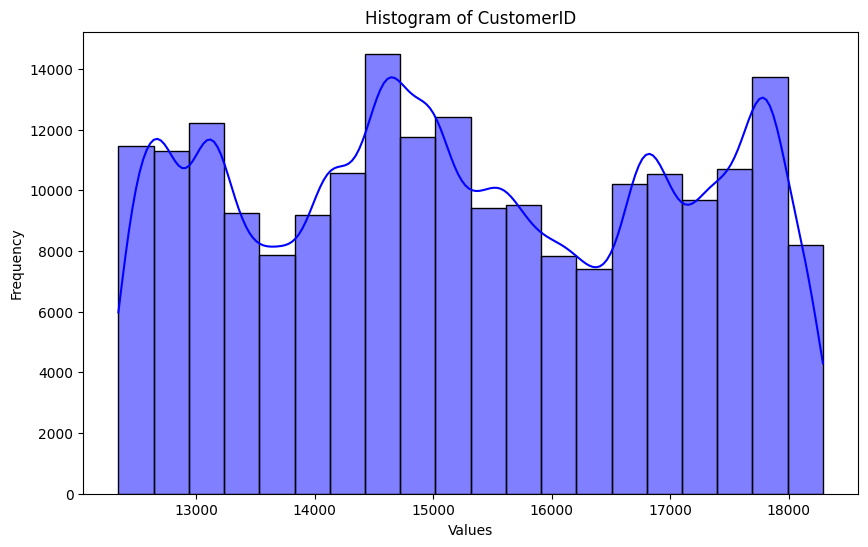

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerID'], bins=20, kde=True, color='blue')
plt.title('Histogram of CustomerID')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

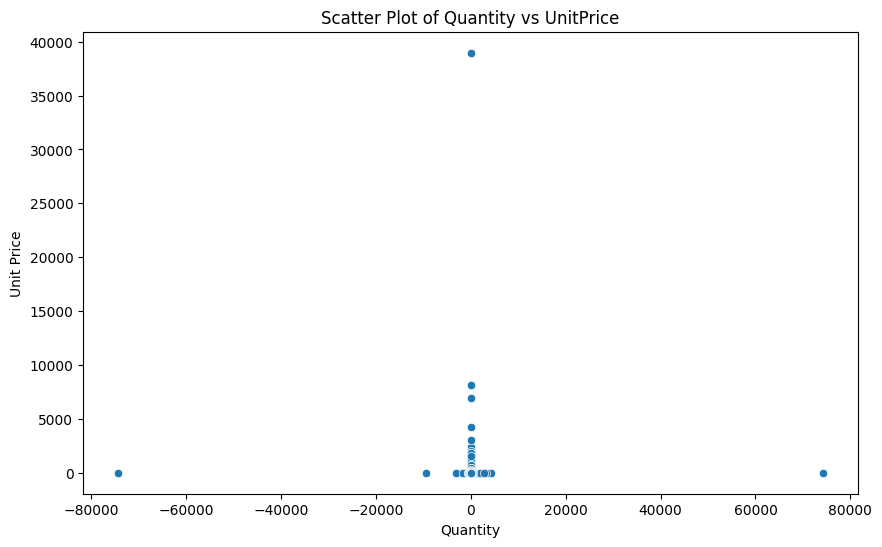

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

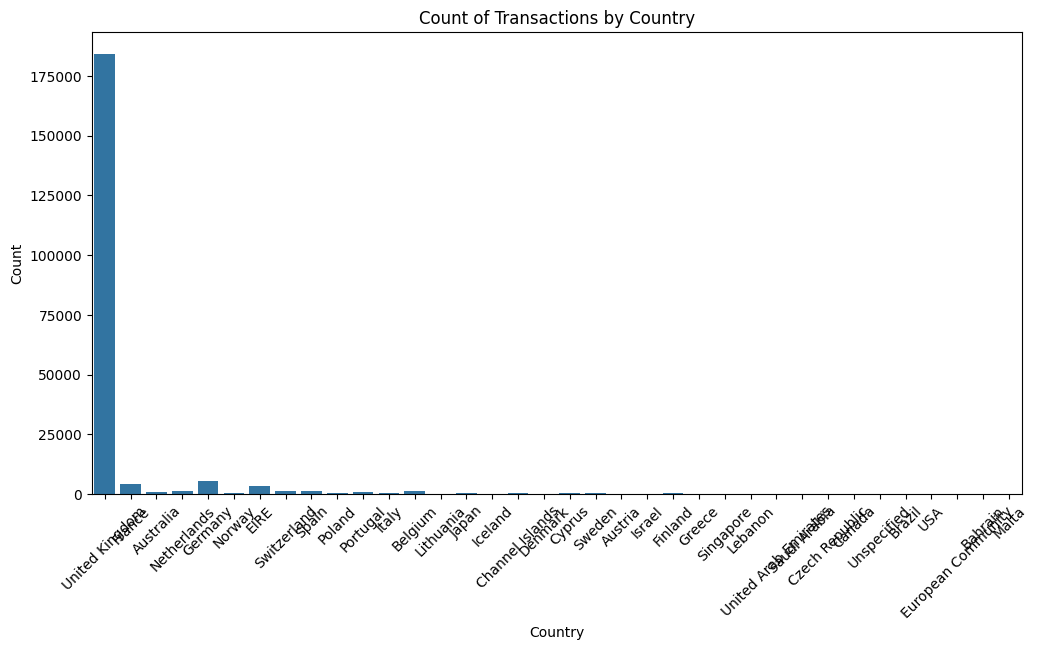

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df)
plt.title('Count of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

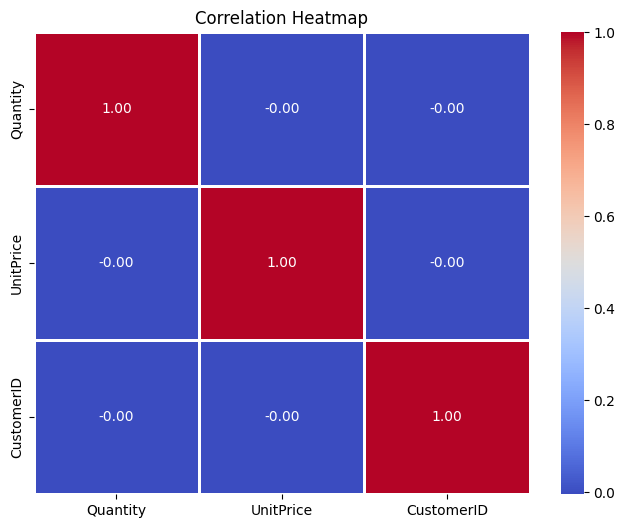

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'CustomerID']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/Online Retail.csv')

X = df[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=8, random_state=48)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_
print("Cluster Centers (original scale):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers (original scale):
[[ 9.55605400e+00  3.62849948e+00]
 [-7.76050000e+04  1.56000000e+00]
 [-6.66666667e-01  5.64337576e+03]
 [ 7.76050000e+04  1.56000000e+00]
 [-1.00000000e+00  3.89700000e+04]
 [-5.55555556e-01  1.42139478e+04]
 [ 7.00564972e-01  1.14292904e+03]
 [ 1.00000000e+00 -1.10620600e+04]]


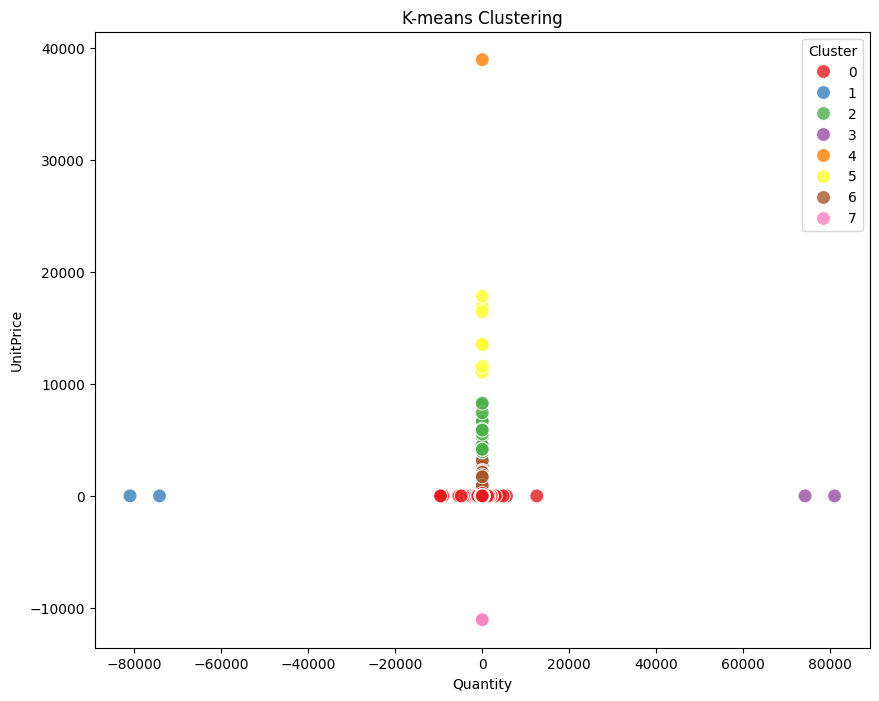

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.8)
plt.title('K-means Clustering')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend(title='Cluster')
plt.show()